# Social Network Analysis using NetworkX

I got married recently - and as part of the planning came deciding on a seating chart for the reception. Since I'm a Data Scientist, I naturally thought - there has to be a way I can apply Data Science methods to help solve this problem.

In this notebook, I'm exploring the connections of my 24 wedding guests using Social Network Analysis with the python package `NetworkX`.

In [2]:
#import packages
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
print(nx.__version__) # built using version 2.1

2.1


### Creating a Network Graph

The first step to creating a network graph is the underlying data. Each row of the data represents a connection between two people, the 'target' and 'source columns. The strength of the relationship is categorized in the 'weight' column. Network Analysis represents data as _nodes_ and _edges_. In my data set, each node is a person and an edge is a relationship between those two people. 

After the data is imported into a pandas dataframe, it can be transformed into the correct data representation for the NetworkX package using the function `from_pandas_edgelist()`. 

In [3]:
#Import CSV
df = pd.read_csv('guests.csv')
df.sample(n=10).head(10)

target  source  weight
0    Kirsty    Alex      10
23     Alex    Dave       3
80   Joseph    Ryan       3
54      Ian    Jane       6
52    Jenny    Ryan       3
107  Meagan   Steve       3
17     Alex   Susie       3
33     Alex     Ann       3
95     Dave  McLeod       3
105  Meagan   Jimmy       3

In [5]:
#Create network edgelist from pandas dataframe
G = nx.from_pandas_edgelist(df, edge_attr='weight')
msg = 'The NetworkX graph has {} nodes (people) and {} edges (relationships).'.format(G.number_of_nodes(), G.number_of_edges())
print(msg)

The NetworkX graph has 24 nodes (people) and 127 edges (relationships).


### Visualizing the Network Graph
After the edge list has been created from the data, it can be visualized. The NetworkX package includes multiple graph layout options which can found in the documentation here:
https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

#### Circular Layout
The circular layout displays all nodes in a circle. It does not attempt to reduce crossings of edges. The circular layout can give you an idea of who has more connections, but does little to help understand the community structure.

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


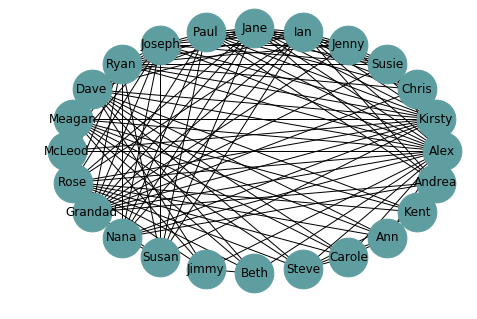

In [89]:
nx.draw(G, node_size = 1500, node_color = 'cadetblue', with_labels = True, pos=nx.circular_layout(G))

#### Spring Layout
The Spring layout position nodes using Fruchterman-Reingold force-directed algorithm. It attempts to have the least number of edges overlapping by simulating attractive force between connected nodes, and repulsive force between nodes that are not connected.

This layout allows us to see more structure in the nodes - here you see the nodes start to seperate into two distinct groups. In this case, those groups represent the two families attending.

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


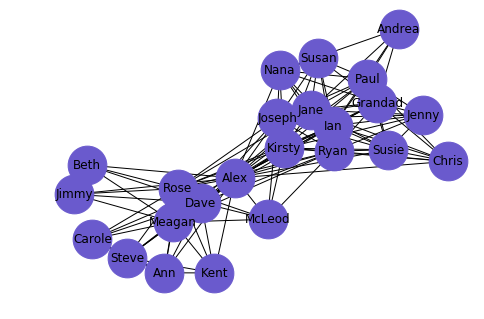

In [88]:
nx.draw(G, node_size = 1500, node_color = 'slateblue', with_labels = True, pos=nx.spring_layout(G), weight='weight')

#### Kamada Kawai Layout

The last layout in this notebook is the Kamada Kawai layout. This layout positions nodes using Kamada-Kawai path-length cost-function.  The Kamada Kawai layout is based on the idea that the graph is a system of springs. "Everypair of nodes, which is connected by edge, is connectedby spring.  The Kamada-Kawai (KK) algorithm is based on the minimization of the energy of the whole system of springs, which represent the graph." (Pospisil et al, 2015).

This graph starts to break apart the guests into more than two groups - you start to see more distinct groups of connections beyond the two families seen in the spring layout.

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


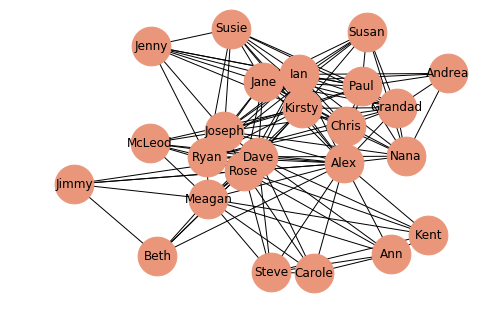

In [90]:
nx.draw(G, node_size = 1500, node_color = 'darksalmon', with_labels = True, pos=nx.kamada_kawai_layout(G), weight='weight')

## Exploring Graph Data

Now that we have a visual way of looking at the connections in this data, we can explore the data further using functions in the NetworkX package.

#### Common Neighbors
Common Neighbors returns a list of other nodes that two nodes in a graph both have edges with. It's like were asking "Who do you both know?"

For example, if I knew that I wanted Meagan and Joseph to sit at the same table, I could look up their common neighbors to decide who else could be at the table:

In [86]:
neighbors = nx.common_neighbors(G=G, u='Meagan', v='Joseph')

for neighbor in neighbors :
    print(neighbor)

Kirsty
Alex
Ryan
Dave
McLeod
Rose


#### Triangles

`nx.triangles()` finds the number of triangles that include a node as one vertex. In other words, it is the number of three-person groups, where all people in that group are connected together. 

In this context, someone with a higher # of triangles would be more flexible to seat, since they know more guests. It's no surprise here that the two people with the highest # of triangles are the Bride and Groom, Kirsty and Alex.

In [44]:
d = nx.triangles(G)

for w in sorted(d, key=d.get, reverse=True):
  print(w, d[w])

Alex 86
Kirsty 76
Ian 70
Jane 70
Ryan 66
Joseph 64
Grandad 59
Dave 55
Rose 55
Paul 49
Susie 41
Meagan 39
Nana 38
Chris 27
Jenny 27
Susan 27
McLeod 20
Steve 20
Ann 20
Carole 15
Kent 15
Jimmy 10
Beth 10
Andrea 10


## Community Detection Algorithms

NetworkX includes algorithms to determine the underlying community structure in a network graph.  Since the use case in this notebook is determining tables, the goal is to find "communities" that map well to table assignments.

#### Girvan Newman

The Girvan Newman algorithm determines communities using centrality - how connected the nodes in the graph are. The algorithm works by calculating the centrality of the nodes, and removing the most valuable edge iteratively. 

In the next code block 

In [99]:
from networkx.algorithms import community

comp = community.girvan_newman(G)
tuple(sorted(c) for c in next(comp))

(['Alex',
  'Ann',
  'Beth',
  'Carole',
  'Dave',
  'Jimmy',
  'Kent',
  'McLeod',
  'Meagan',
  'Rose',
  'Steve'],
 ['Andrea',
  'Chris',
  'Grandad',
  'Ian',
  'Jane',
  'Jenny',
  'Joseph',
  'Kirsty',
  'Nana',
  'Paul',
  'Ryan',
  'Susan',
  'Susie'])

In [7]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
communities = sorted(map(sorted, top_level_communities))
communities

[['Alex',
  'Ann',
  'Beth',
  'Carole',
  'Dave',
  'Jimmy',
  'Kent',
  'McLeod',
  'Meagan',
  'Rose',
  'Steve'],
 ['Andrea',
  'Chris',
  'Grandad',
  'Ian',
  'Jane',
  'Jenny',
  'Joseph',
  'Kirsty',
  'Nana',
  'Paul',
  'Ryan',
  'Susan',
  'Susie']]

In [9]:
import itertools

k = 4
comp = community.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 

(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Andrea', 'Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'McLeod', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['Andrea'])
(['Alex', 'Ann', 'Beth', 'Carole', 'Dave', 'Jimmy', 'Kent', 'Meagan', 'Rose', 'Steve'], ['Chris', 'Grandad', 'Ian', 'Jane', 'Jenny', 'Joseph', 'Kirsty', 'Nana', 'Paul', 'Ryan', 'Susan', 'Susie'], ['McLeod'], ['Andrea'])


#### Asynchronous Fluid Communities

Another method of community deteciton is Asynchronous Fluid communities, which is "based on the idea of fluids interacting in an environment, expanding and contracting as a result of that interaction (Ferran, 2017). Asynchronous Fluid Communities is unique in that it defines a number of communities as a parameter to running the algorithm.

In [110]:
no_tables = 4
fluid_communities = community.asyn_fluidc(G, k = no_tables, max_iter=1000)

for element in fluid_communities:
     print(element)

{'Rose', 'McLeod', 'Meagan', 'Dave', 'Beth', 'Jimmy'}
{'Grandad', 'Joseph', 'Andrea', 'Paul', 'Jane', 'Nana', 'Susan'}
{'Steve', 'Ann', 'Alex', 'Kent', 'Carole'}
{'Jenny', 'Ryan', 'Ian', 'Susie', 'Chris', 'Kirsty'}
